## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../dataset/dataset.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting Dataset

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0

## Neural Network

In [33]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

In [34]:
def ReLU(Z):
    return np.maximum(0, Z)

In [35]:
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

In [36]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [37]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [38]:
def diff_RelU(Z):
    return Z > 0

In [39]:
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * diff_RelU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1)

    return dW1, db1, dW2, db2

In [40]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    return W1, b1, W2, b2

In [41]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f'Iteration: {i}, Accuracy: {accuracy(get_predictions(A2), Y)}')
    return W1, b1, W2, b2

## Testing

In [43]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.05)

[8 1 8 ... 8 1 1] [4 9 7 ... 4 3 0]
Iteration: 0, Accuracy: 0.09734146341463415
[6 1 2 ... 8 0 2] [4 9 7 ... 4 3 0]
Iteration: 10, Accuracy: 0.13939024390243904
[6 1 2 ... 8 0 2] [4 9 7 ... 4 3 0]
Iteration: 20, Accuracy: 0.17578048780487804
[6 1 2 ... 8 0 2] [4 9 7 ... 4 3 0]
Iteration: 30, Accuracy: 0.20512195121951218
[6 1 2 ... 8 0 2] [4 9 7 ... 4 3 0]
Iteration: 40, Accuracy: 0.23585365853658535
[6 1 2 ... 7 1 2] [4 9 7 ... 4 3 0]
Iteration: 50, Accuracy: 0.2768536585365854
[6 1 2 ... 7 1 6] [4 9 7 ... 4 3 0]
Iteration: 60, Accuracy: 0.3167317073170732
[6 1 2 ... 7 1 6] [4 9 7 ... 4 3 0]
Iteration: 70, Accuracy: 0.3533414634146341
[6 1 2 ... 3 1 6] [4 9 7 ... 4 3 0]
Iteration: 80, Accuracy: 0.3856341463414634
[6 1 2 ... 3 1 6] [4 9 7 ... 4 3 0]
Iteration: 90, Accuracy: 0.4158292682926829
[6 8 2 ... 3 1 6] [4 9 7 ... 4 3 0]
Iteration: 100, Accuracy: 0.44795121951219513
[6 8 2 ... 3 1 6] [4 9 7 ... 4 3 0]
Iteration: 110, Accuracy: 0.4781219512195122
[6 8 2 ... 3 8 6] [4 9 7 ... 4 3 

In [44]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


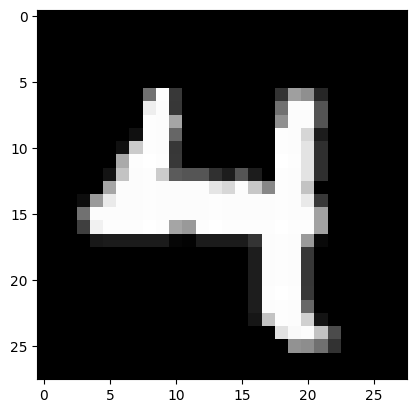

Prediction:  [9]
Label:  9


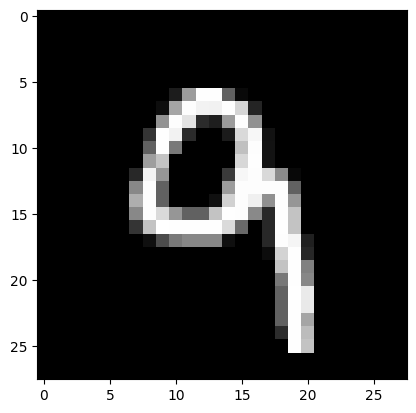

Prediction:  [7]
Label:  7


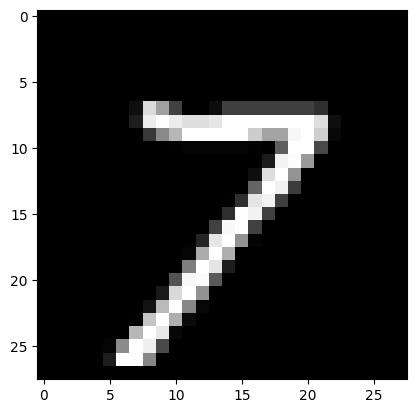

Prediction:  [5]
Label:  5


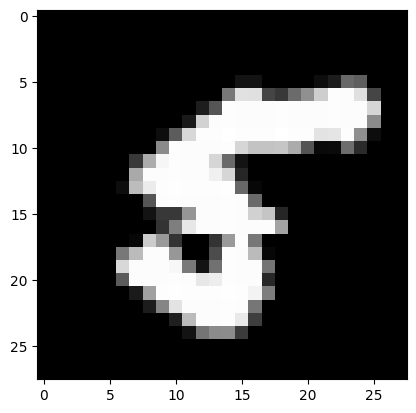

In [45]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [46]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
accuracy(dev_predictions, Y_dev)

[2 5 1 1 4 6 9 8 6 2 5 2 1 1 9 8 0 1 2 9 3 8 0 3 0 7 3 3 6 6 8 8 1 6 9 2 2
 3 0 3 9 6 1 5 5 0 5 4 5 4 4 9 0 5 9 9 6 0 3 8 4 7 2 1 2 5 2 6 1 4 0 3 2 3
 2 3 5 9 4 2 6 4 3 9 7 4 0 4 0 9 8 5 3 8 6 0 9 7 3 5 0 8 6 5 0 6 0 5 3 9 7
 7 7 9 6 7 8 5 0 0 2 4 7 3 6 8 1 7 8 7 9 6 4 2 6 3 4 2 7 4 4 1 8 8 9 2 2 8
 1 4 5 7 5 6 7 1 2 6 9 0 9 2 3 2 6 1 5 9 2 9 0 4 2 2 3 8 0 8 6 2 3 7 9 4 2
 9 2 7 6 7 4 9 6 8 9 6 5 8 7 9 9 9 5 7 0 9 2 7 5 1 1 4 8 7 8 1 8 3 5 3 8 3
 7 7 4 8 6 7 1 9 2 8 0 6 9 0 5 6 6 4 1 3 9 7 5 5 5 4 2 9 7 0 1 4 7 7 8 5 3
 6 1 1 1 3 3 6 7 7 8 1 0 9 9 1 0 9 3 0 5 1 5 7 4 3 8 1 7 7 7 7 5 8 6 2 8 9
 0 1 9 1 7 4 6 0 8 0 1 3 6 1 0 2 3 5 3 8 6 0 2 4 3 8 2 3 3 5 6 5 8 3 6 4 0
 2 0 9 9 0 1 7 3 1 6 1 5 6 8 5 1 9 0 0 3 3 5 3 7 1 3 1 1 0 2 8 1 6 1 3 0 0
 6 2 2 4 8 4 6 9 7 6 8 8 0 9 1 1 2 5 0 2 6 6 5 0 5 8 5 6 9 8 0 9 6 4 1 4 2
 8 0 1 9 7 6 3 6 3 5 2 2 6 5 7 5 7 8 6 9 0 0 3 7 3 5 2 1 2 1 6 6 1 7 0 4 0
 0 9 1 1 3 1 6 1 2 6 8 0 5 6 4 7 7 6 7 6 8 9 4 1 8 4 1 9 7 9 8 4 0 2 1 8 1
 9 3 7 3 8 7 4 9 6 1 4 4 

np.float64(0.849)